# Checking out the data

## Imports

In [1]:
import pandas as pd

from scipy import stats

import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## Read in the data

In [2]:
X_df = pd.read_csv('../../data/prepared/train_data.csv')
X_df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470739,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,2017-11-06,0.730505,0.589866,0.051951,1.008380,0.008432,0.137431,0.000815,0.004927,...,NaN,NaN,NaN,0.005826,0.002661,0.006540,NaN,0.002191,0.001231,0.007120
470740,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,2017-12-03,0.833949,0.005199,0.013103,1.005107,0.001183,0.134598,0.003260,0.001333,...,NaN,NaN,NaN,0.009753,0.009238,0.006315,NaN,0.009012,0.000864,0.005220
470741,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,2018-01-16,0.837949,0.008265,0.013163,1.007224,0.005757,0.133852,0.005954,0.007394,...,NaN,NaN,NaN,0.008494,0.001622,0.009657,NaN,0.005007,0.008420,0.002532
470742,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,2018-02-23,0.812465,0.002464,0.016056,1.003230,0.007137,0.136428,0.000088,0.009943,...,NaN,NaN,NaN,0.009720,0.009944,0.001952,NaN,0.007779,0.005021,0.005594


In [3]:
y_df = pd.read_csv('../../data/prepared/train_labels.csv')
y_df

,customer_ID,target
0,e039c846adcb1bfd543d89b8beba6a0f1a2ecdf835cd22...,0
1,8a96ff0aacb31ab4aab4cd15f13e024c04f986b8926789...,0
2,cfe6ef5945ef9c04937bb1826ec350ae7f2d173867f7fe...,0
3,9b677e823a94355cf65d2b97930dd59fce82cbf69e82b8...,1
4,d48853a03d0d463a4b058d129453daaf530160ccc4f0c2...,0
...,...,...
39002,79d17f1e1bee31fe1e1f9f6c69cadb8d1c9f6d6f7b9071...,0
39003,5bb1b40a1b26232d9140b8cab0f26639a54d2af554f6f6...,0
39004,8edaca5e3bfb75028c71f11b38d0cb1d7e2565277ec909...,1
39005,8d0f928ebe331f7e9bcf6b4bfed6f305328ebdebe8b7f4...,0


## Declare the special columns

In [4]:
cat_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
date_column = ['S_2']

## Let's check out the nulls

In [5]:
null_dict = {
    'total_nulls': X_df.drop(columns='customer_ID').isna().sum(),
    'percent_nulls': X_df.drop(columns='customer_ID').isna().sum() / X_df.shape[0],
}

null_df = pd.DataFrame.from_dict(null_dict)
null_df

,total_nulls,percent_nulls
S_2,0,0.000000
P_2,3937,0.008363
D_39,0,0.000000
B_1,0,0.000000
B_2,188,0.000399
...,...,...
D_141,8390,0.017823
D_142,389671,0.827777
D_143,8390,0.017823
D_144,3376,0.007172


### I will print all of them out so we can see all of the columns

In [6]:
with pd.option_context('display.max_rows', None,):
    print(null_df.sort_values('total_nulls'))

       total_nulls  percent_nulls
S_2              0       0.000000
R_13             0       0.000000
B_28             0       0.000000
R_11             0       0.000000
R_10             0       0.000000
S_16             0       0.000000
R_8              0       0.000000
R_7              0       0.000000
B_24             0       0.000000
D_75             0       0.000000
R_14             0       0.000000
P_4              0       0.000000
S_15             0       0.000000
D_71             0       0.000000
B_21             0       0.000000
S_13             0       0.000000
R_6              0       0.000000
S_12             0       0.000000
B_18             0       0.000000
D_65             0       0.000000
D_63             0       0.000000
B_23             0       0.000000
S_11             0       0.000000
R_15             0       0.000000
S_18             0       0.000000
R_28             0       0.000000
D_127            0       0.000000
B_36             0       0.000000
D_96          

### I'm gonna add a column with just the feature category denoted so we can see if one of the categories is a worse offender in the null department

In [7]:
null_df['feature_category'] = null_df.index.str[0]
null_df

,total_nulls,percent_nulls,feature_category
S_2,0,0.000000,S
P_2,3937,0.008363,P
D_39,0,0.000000,D
B_1,0,0.000000,B
B_2,188,0.000399,B
...,...,...,...
D_141,8390,0.017823,D
D_142,389671,0.827777,D
D_143,8390,0.017823,D
D_144,3376,0.007172,D


### Now let's groupby those feature categories to see which category has the worst null situation

For reference: 
* D_* = Delinquency variables
* S_* = Spend variables
* P_* = Payment variables
* B_* = Balance variables
* R_* = Risk variables

In [8]:
null_df.groupby('feature_category').percent_nulls.agg(['mean', 'median', 'max', 'min']).sort_values('mean', ascending=False)

,mean,median,max,min
feature_category,,,,
D,0.234015,0.030940,0.999303,0.0
B,0.087453,0.000095,0.993852,0.0
R,0.066230,0.000000,0.943436,0.0
S,0.053322,0.000000,0.533373,0.0
P,0.020562,0.008363,0.053322,0.0


#### We can see that D (Delinquency) is definitely has some issues that need to be worked out

### Let's see which category has the most columns with over 50% nulls

In [9]:
null_df[null_df.percent_nulls > 0.5].feature_category.value_counts()

D    23
B     4
R     2
S     1
Name: feature_category, dtype: int64

#### Yep, we will definitely need to address the D features

### Let's see some of these worst offenders

In [10]:
null_df[null_df.percent_nulls > 0.5].sort_values('percent_nulls', ascending=False)

,total_nulls,percent_nulls,feature_category
D_87,470416,0.999303,D
D_88,470267,0.998987,D
D_108,468388,0.994995,D
D_111,468054,0.994286,D
D_110,468054,0.994286,D
B_39,467850,0.993852,B
D_73,466143,0.990226,D
B_42,464984,0.987764,B
D_138,454083,0.964607,D
D_137,454083,0.964607,D


### Now lets see what the top three of these have for values

In [11]:
X_df.D_87.value_counts()

1.0    328
Name: D_87, dtype: int64

#### We may be able to just replace nulls with 0 here

#### I wonder if whether some one defaults is dependent on this column?

In [12]:
y_df[y_df.customer_ID.isin(X_df[X_df.D_87 == 1.0].customer_ID.unique())].target.value_counts()

1    66
0     5
Name: target, dtype: int64

#### Definitely should check this out in stats testing

In [13]:
X_df.D_88.value_counts().sort_index()

0.001298    1
0.002024    1
0.002198    1
0.002913    1
0.003060    1
           ..
1.116391    1
1.129838    1
1.155481    1
2.634243    1
2.669250    1
Name: D_88, Length: 477, dtype: int64

#### Here we may need to find an imputation method

In [14]:
X_df.D_108.value_counts().sort_index()

0.000007    1
0.000009    1
0.000025    1
0.000025    1
0.000032    1
           ..
2.009450    1
3.001026    1
3.003443    1
3.003562    1
4.000103    1
Name: D_108, Length: 2356, dtype: int64

#### Same with this one

## Let's begin looking at how to impute each column

In [15]:
has_nulls_df = null_df[null_df.total_nulls > 0].sort_values('total_nulls')
has_nulls_df

,total_nulls,percent_nulls,feature_category
B_40,2,0.000004,B
B_37,2,0.000004,B
R_20,4,0.000008,R
R_12,4,0.000008,R
B_6,23,0.000049,B
...,...,...,...
D_111,468054,0.994286,D
D_110,468054,0.994286,D
D_108,468388,0.994995,D
D_88,470267,0.998987,D


#### This chunk of code takes a while to run so I will leave it for later

In [16]:
# all_corr_dict = {}

# for column_to_check in has_nulls_df.index:
    
#     corr_dict = {
#         'column': [],
#         'r': [],
#         'p': [],
#     }
    
#     columns_to_drop = cat_columns + date_column + ['customer_ID'] + [column_to_check]

#     for column in X_df.drop(columns=columns_to_drop).columns:

#         corr_df = X_df[[column, column_to_check]].dropna()
        
#         if corr_df.shape[0] > 1:

#             r, p = stats.pearsonr(corr_df[column], corr_df[column_to_check])

#             corr_dict['column'].append(column)
#             corr_dict['r'].append(abs(r))
#             corr_dict['p'].append(p)
        
#     all_corr_dict[column_to_check] = corr_dict

### Categorical columns

In [17]:
null_df[null_df.index.isin(cat_columns)]

,total_nulls,percent_nulls,feature_category
D_63,0,0.000000,D
D_64,18123,0.038499,D
D_66,418967,0.890010,D
D_68,17974,0.038182,D
B_30,188,0.000399,B
B_38,188,0.000399,B
D_114,14565,0.030940,D
D_116,14565,0.030940,D
D_117,14565,0.030940,D
D_120,14565,0.030940,D


In [18]:
for column in cat_columns:
    print('---' + column + '---')
    print(X_df[column].value_counts())
    print()

---B_30---
0.0    400450
1.0     65445
2.0      4661
Name: B_30, dtype: int64

---B_38---
2.0    163862
3.0    107475
1.0    100110
5.0     38023
4.0     24854
7.0     22060
6.0     14172
Name: B_38, dtype: int64

---D_114---
1.0    282185
0.0    173994
Name: D_114, dtype: int64

---D_116---
0.0    455744
1.0       435
Name: D_116, dtype: int64

---D_117---
-1.0    123351
 3.0     99136
 4.0     96897
 2.0     56705
 5.0     39870
 6.0     29767
 1.0     10453
Name: D_117, dtype: int64

---D_120---
0.0    403386
1.0     52793
Name: D_120, dtype: int64

---D_126---
 1.0    363219
 0.0     75878
-1.0     22005
Name: D_126, dtype: int64

---D_63---
CO    352487
CR     78149
CL     36516
XZ      2041
XM       912
XL       639
Name: D_63, dtype: int64

---D_64---
O     248001
U     129548
R      71674
-1      3398
Name: D_64, dtype: int64

---D_66---
1.0    51243
0.0      534
Name: D_66, dtype: int64

---D_68---
6.0    237430
5.0    102530
3.0     41136
4.0     40746
2.0     18496
1.0     1

#### This function imputes values for Cat variables

In [19]:
for column in cat_columns:
    
    if pd.api.types.is_numeric_dtype(X_df[column]):
        
        impute_value = X_df[column].value_counts().index.max() + 1
        
        X_df[column] = X_df[column].fillna(impute_value)
        
    else:
        
        impute_value = 'Unknown'
        
        X_df[column] = X_df[column].fillna(impute_value)
        
X_df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470739,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,2017-11-06,0.730505,0.589866,0.051951,1.008380,0.008432,0.137431,0.000815,0.004927,...,NaN,NaN,NaN,0.005826,0.002661,0.006540,NaN,0.002191,0.001231,0.007120
470740,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,2017-12-03,0.833949,0.005199,0.013103,1.005107,0.001183,0.134598,0.003260,0.001333,...,NaN,NaN,NaN,0.009753,0.009238,0.006315,NaN,0.009012,0.000864,0.005220
470741,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,2018-01-16,0.837949,0.008265,0.013163,1.007224,0.005757,0.133852,0.005954,0.007394,...,NaN,NaN,NaN,0.008494,0.001622,0.009657,NaN,0.005007,0.008420,0.002532
470742,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,2018-02-23,0.812465,0.002464,0.016056,1.003230,0.007137,0.136428,0.000088,0.009943,...,NaN,NaN,NaN,0.009720,0.009944,0.001952,NaN,0.007779,0.005021,0.005594


### Continuous columns

#### Impute median per customer for columns that have 10% or less nulls and if customer is all null impute -1 (or something like that)

In [20]:
null_df

,total_nulls,percent_nulls,feature_category
S_2,0,0.000000,S
P_2,3937,0.008363,P
D_39,0,0.000000,D
B_1,0,0.000000,B
B_2,188,0.000399,B
...,...,...,...
D_141,8390,0.017823,D
D_142,389671,0.827777,D
D_143,8390,0.017823,D
D_144,3376,0.007172,D


In [21]:
null_df[null_df.percent_nulls > .10].sort_values('percent_nulls', ascending=False)

,total_nulls,percent_nulls,feature_category
D_87,470416,0.999303,D
D_88,470267,0.998987,D
D_108,468388,0.994995,D
D_110,468054,0.994286,D
D_111,468054,0.994286,D
B_39,467850,0.993852,B
D_73,466143,0.990226,D
B_42,464984,0.987764,B
D_134,454083,0.964607,D
D_136,454083,0.964607,D


### Special columns

#### D_87

##### Let's at the percentage of nulls in this column by customer

In [22]:
X_df['is_na_D_87'] = X_df.D_87.isna()

In [23]:
cust_null_percenctage_df = pd.DataFrame(X_df.groupby('customer_ID').is_na_D_87.mean())
cust_null_percenctage_df

,is_na_D_87
customer_ID,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,1.0
0005ef1480ffe4f0e5908eae07db8e05f2e705bca6a57db3b97d1da2eb6c7cab,1.0
0005f2ab0cc352cd64eac9e60b981ed8c3289d20fa5fcef78973c468916fdfc9,1.0
0007ee1ac8edb6be588c6c8a158d2268e3228c49cf52773d168012076c118e5f,1.0
0008ef32824d3067b4d8ab70e7c79fa04c808f4d99194fe9c7827dac8bcf0b5c,1.0
...,...
ffeea21b8f17b728c561de93ea61e75547dd0216b36beba487c9ab3efa985fd5,1.0
ffeec9a34770713d0c488435fbff21db356407c98d9ddb37b535caa87979c61c,1.0
fff17a28a4594efc934648f3c33d295d452d61e2bda01df4b13952f48dfa1175,1.0


##### Let's see what the distribution of the target is for customers that have different percentage of nulls in this column

In [24]:
y_df[y_df.customer_ID.isin(cust_null_percenctage_df[cust_null_percenctage_df.is_na_D_87 < 1].index)].target.value_counts(normalize=True)

1    0.929577
0    0.070423
Name: target, dtype: float64

In [25]:
y_df[y_df.customer_ID.isin(cust_null_percenctage_df[cust_null_percenctage_df.is_na_D_87 < 0.75].index)].target.value_counts(normalize=True)

1    0.866667
0    0.133333
Name: target, dtype: float64

In [26]:
y_df[y_df.customer_ID.isin(cust_null_percenctage_df[cust_null_percenctage_df.is_na_D_87 < 0.5].index)].target.value_counts(normalize=True)

1    0.84
0    0.16
Name: target, dtype: float64

In [27]:
y_df[y_df.customer_ID.isin(cust_null_percenctage_df[cust_null_percenctage_df.is_na_D_87 < 0.25].index)].target.value_counts(normalize=True)

1    0.823529
0    0.176471
Name: target, dtype: float64

##### And for customers that don't have any values

In [28]:
y_df[y_df.customer_ID.isin(cust_null_percenctage_df[cust_null_percenctage_df.is_na_D_87 == 1].index)].target.value_counts(normalize=True)

0    0.73965
1    0.26035
Name: target, dtype: float64

##### So we can see that if the customer has at least one value in D_87 there is a high chance they will default

##### Lets see what values are in D_87

In [29]:
X_df.D_87.value_counts()

1.0    328
Name: D_87, dtype: int64

##### Impute 0 for null, because we can see that having a 1 drastically ups your chance of defaulting

#### D_88

##### Let's see the values that are in this column

In [30]:
X_df.D_88.value_counts()

1.155481    1
0.251400    1
0.001298    1
0.008792    1
0.025294    1
           ..
0.095145    1
0.193478    1
0.005232    1
0.009055    1
0.012182    1
Name: D_88, Length: 477, dtype: int64

<AxesSubplot:>

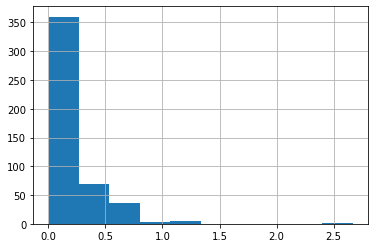

In [31]:
X_df.D_88.hist()

In [32]:
X_df.D_88.describe()

count    477.000000
mean       0.186558
std        0.264305
min        0.001298
25%        0.027272
50%        0.095057
75%        0.264470
max        2.669250
Name: D_88, dtype: float64

##### We can see that the values range from 0.001 to 2.66

##### Let's get the percentage of null by customer

In [33]:
X_df['is_na_D_88'] = X_df.D_88.isna()
cust_null_percentage_df = pd.DataFrame(X_df.groupby('customer_ID').is_na_D_88.mean())
cust_null_percentage_df['null_count'] = X_df.groupby('customer_ID').is_na_D_88.sum()
cust_null_percentage_df

,is_na_D_88,null_count
customer_ID,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,1.0,13
0005ef1480ffe4f0e5908eae07db8e05f2e705bca6a57db3b97d1da2eb6c7cab,1.0,2
0005f2ab0cc352cd64eac9e60b981ed8c3289d20fa5fcef78973c468916fdfc9,1.0,13
0007ee1ac8edb6be588c6c8a158d2268e3228c49cf52773d168012076c118e5f,1.0,13
0008ef32824d3067b4d8ab70e7c79fa04c808f4d99194fe9c7827dac8bcf0b5c,1.0,13
...,...,...
ffeea21b8f17b728c561de93ea61e75547dd0216b36beba487c9ab3efa985fd5,1.0,13
ffeec9a34770713d0c488435fbff21db356407c98d9ddb37b535caa87979c61c,1.0,13
fff17a28a4594efc934648f3c33d295d452d61e2bda01df4b13952f48dfa1175,1.0,13


##### Let's look at the distribution of the target for different percentages of nulls

In [34]:
y_df[y_df.customer_ID.isin(cust_null_percentage_df[cust_null_percentage_df.is_na_D_88 < 1].index)].target.value_counts(normalize=True)

1    0.82199
0    0.17801
Name: target, dtype: float64

In [35]:
y_df[y_df.customer_ID.isin(cust_null_percentage_df[cust_null_percentage_df.is_na_D_88 < .75].index)].target.value_counts(normalize=True)

1    0.821429
0    0.178571
Name: target, dtype: float64

In [36]:
y_df[y_df.customer_ID.isin(cust_null_percentage_df[cust_null_percentage_df.is_na_D_88 < 0.5].index)].target.value_counts(normalize=True)

1    1.0
Name: target, dtype: float64

In [37]:
y_df[y_df.customer_ID.isin(cust_null_percentage_df[cust_null_percentage_df.is_na_D_88 < 0.25].index)].target.value_counts(normalize=True)

Series([], Name: target, dtype: float64)

In [38]:
y_df[y_df.customer_ID.isin(cust_null_percentage_df[cust_null_percentage_df.is_na_D_88 == 1].index)].target.value_counts(normalize=True)

0    0.741189
1    0.258811
Name: target, dtype: float64

##### And let's see what the mean and median are for customers who do have values

In [39]:
D_88_df = pd.DataFrame(X_df.groupby('customer_ID').D_88.mean()[~X_df.groupby('customer_ID').D_88.mean().isna()])
D_88_df

,D_88
customer_ID,
00dc6e2707543e0509c790e53e719129482f03b095647d0272ce4910d93382a7,0.651718
01dd312ce595cefe1f337742113314170a145e1516b9be90d547370d7f555ae2,0.034847
0234373e43b2d629ad6532b5d8620acba3a28559131e26bd19b25293396aa136,0.454432
059834f4276a8a31f697b0dbf7453a20f5811e6d7927d82a26b95d7e9ca0cf4a,0.150226
05d9cd8a938b6c9aff42be0cab2bb11b7bb50232ee696a5f9d6ab0741fb95ab4,0.029573
...,...
fdaef672d7dd696a86a4a7c4898b38a4ffd46b4adb4113cffa93d7b21d4819d6,0.535183
fdb4f4bf5e3a280de7ff6ace04e88bdb93988b4357b93640b3e1a388fa975f52,0.009404
ff4c803f638a4ef1902847d578fd615f0952ec9bccb71dbdb7f1ae05695ee610,0.125149


In [40]:
D_88_df['target'] = y_df[y_df.customer_ID.isin(D_88_df.index)].sort_values('customer_ID').target.tolist()
D_88_df

,D_88,target
customer_ID,,
00dc6e2707543e0509c790e53e719129482f03b095647d0272ce4910d93382a7,0.651718,1
01dd312ce595cefe1f337742113314170a145e1516b9be90d547370d7f555ae2,0.034847,0
0234373e43b2d629ad6532b5d8620acba3a28559131e26bd19b25293396aa136,0.454432,1
059834f4276a8a31f697b0dbf7453a20f5811e6d7927d82a26b95d7e9ca0cf4a,0.150226,1
05d9cd8a938b6c9aff42be0cab2bb11b7bb50232ee696a5f9d6ab0741fb95ab4,0.029573,1
...,...,...
fdaef672d7dd696a86a4a7c4898b38a4ffd46b4adb4113cffa93d7b21d4819d6,0.535183,1
fdb4f4bf5e3a280de7ff6ace04e88bdb93988b4357b93640b3e1a388fa975f52,0.009404,1
ff4c803f638a4ef1902847d578fd615f0952ec9bccb71dbdb7f1ae05695ee610,0.125149,1


In [41]:
D_88_df.groupby('target').mean()

,D_88
target,
0,0.070157
1,0.211775


In [42]:
D_88_df.groupby('target').median()

,D_88
target,
0,0.037709
1,0.146516


##### So we should impute 0 for customer who have no values and the mean of the customer for customers who have a value